# Week 2 Ingesting and Exploring the Dataset

In [1]:
# install wordcloud
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
# change working directory
import os
os.getcwd()  # Get current working directory
os.chdir('..')  # Move up one directory level from notebooks
print(os.getcwd())
#os.chdir('../data') # change to the data folder

/home/jupyter-geean/cookiecutter-data-science/{{ cookiecutter.repo_name }}


In [4]:
# load the data
df = pd.read_csv('data/Combined Data.csv', index_col=0)


In [5]:
# make a copy and get rid of the missing values
df1 = df.copy()
df1.dropna(inplace = True)
# see the top head of the data
df1.head()

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety


In [6]:
# number of missing values
missing_values = df.isnull().sum()

print(missing_values)

statement    362
status         0
dtype: int64


In [7]:
# get the rows and columns of all of the data
rows,columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 53043
Number of columns: 2


In [8]:
# calculate the number of missing values
rows_with_missing = df[df.isnull().any(axis=1)]
print(rows_with_missing)

      statement   status
293         NaN  Anxiety
572         NaN  Anxiety
595         NaN  Anxiety
1539        NaN   Normal
2448        NaN   Normal
...         ...      ...
52838       NaN  Anxiety
52870       NaN  Anxiety
52936       NaN  Anxiety
53010       NaN  Anxiety
53031       NaN  Anxiety

[362 rows x 2 columns]


The dataset contains 362 missing values in the 'Statement' column and no missing values for 'Status'.


# Missing Values -Week 3

Many of the rows have NaNs and represent anxiety and normal. Since there are 53,043 values and there are only 362 rows where there is missing values. We feel that it is best to drop these rows since they represent only 0.7% of the data and as you will see later we have an abundance of "normal" and "anxiety" labeled data.

The dataset includes 52,681 rows and 2 columns after removing missing values.

In [9]:
# get the rows and columns of the data that drops the missing values
rows,columns = df1.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 52681
Number of columns: 2


 We want to add a column to explore the length of each statement. This can help us quantify the user's input and support further analysis. This will give us an idea on how to preprocess the text and determine tokenization especially for transformer models. Many NLP models, especially those based on deep learning, have limitations on input length so determining the length is important.

In [10]:
# create a new column that gives the length of each statement
df1['statement_len'] = df1['statement'].apply(lambda x: len(x.split(' ')))
df1.head()

,statement,status,statement_len
0,oh my gosh,Anxiety,3
1,"trouble sleeping, confused mind, restless hear...",Anxiety,10
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,14
3,I've shifted my focus to something else but I'...,Anxiety,11
4,"I'm restless and restless, it's been a month n...",Anxiety,14


From the output, we can see that this dataset includes 2 variables: statement and status.

The statement variable is a text variable that contains different user inputs.

The status variable represents different emotional statuses, which contain different categories.

The next step is to explore dataset

In [11]:
# information about the dataset
'''The class type of the DataFrame.
The range of the index.
The number of columns and their names.
The count of non-null values in each column.
The data type of each column.
The memory usage of the DataFrame.'''

print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 52681 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   statement      52681 non-null  object
 1   status         52681 non-null  object
 2   statement_len  52681 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ MB
None


Statement and status column are object data types. The statement_len column is an integer/numeric datatype.

In [12]:
# descriptive statistics
'''count is the number of non-null entries.
unique is the number of unique values.
top is the most frequent value.
freq is the frequency of the most frequent value.'''
df1.describe(include='object').T

,count,unique,top,freq
statement,52681,51073,what do you mean?,22
status,52681,7,Normal,16343


The 'Statement' column contains 51,073 unique values, indicating that most user inputs are unique. The most frequently appeared statement is "What do you mean?" and occurred 22 times in the dataset. The frequent occurrence of "What do you mean?" suggests significant communication gaps or misunderstandings, indicating areas where individuals feel confused or need more clarity, which is crucial in mental health discussions. This phrase often reflects a state of uncertainty or anxiety, signaling important emotional states. It could also indicate active engagement and a desire for better understanding and it could indicate that individuals need more support or reassurance, aiding in tailoring mental health resources effectively.

The 'Status' column contains 7 unique values and represents different emotion statuses. The most common status is "Normal", suggesting that over 30% of the statements in the dataset fall under this category.

In [13]:
# Get summary statistics for the 'statement_len' column
summary_statistics = df1['statement_len'].describe()
print(summary_statistics)

count    52681.000000
mean       113.035914
std        163.501877
min          1.000000
25%         15.000000
50%         62.000000
75%        148.000000
max       6300.000000
Name: statement_len, dtype: float64


In [14]:
# Calculate the mode of the 'statement_len' column
mode_value = df1['statement_len'].mode()[0]

print(f"The mode of the 'statement_len' column is: {mode_value}")

The mode of the 'statement_len' column is: 5


The summary statistics for the 'Statement_len' column show the distribution of statment lengths. The average statement contains 113 words with a standard deviation of 163.5 words. The shortest statement only has 1 word, while the longest contains 6300 words. The most frequent statement length is 5 words, indicating that short phrases are commonly used.

The following bar plot of the frequency of statement length visualizes the previous statement.

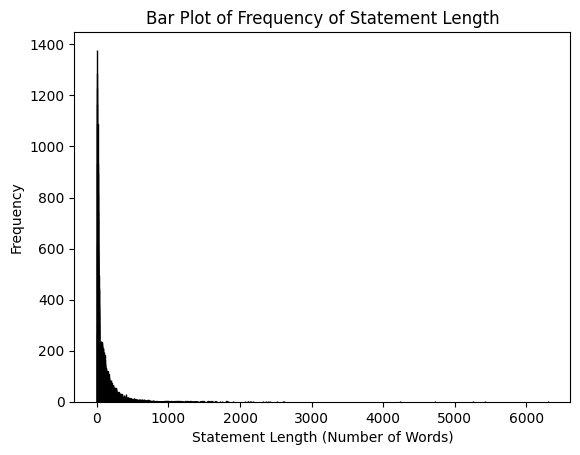

In [15]:
# Create a bar plot of the frequency of the 'statement_len' column
statement_len_counts = df1['statement_len'].value_counts()

plt.bar(statement_len_counts.index, statement_len_counts.values, edgecolor='black')
plt.xlabel('Statement Length (Number of Words)')
plt.ylabel('Frequency')
plt.title('Bar Plot of Frequency of Statement Length')
plt.show()

The histogram shows that it is a right skewed distribution, which most of the statement length under 1000 words.
This means that when we focus on the output length, we should set it to be under 1000.

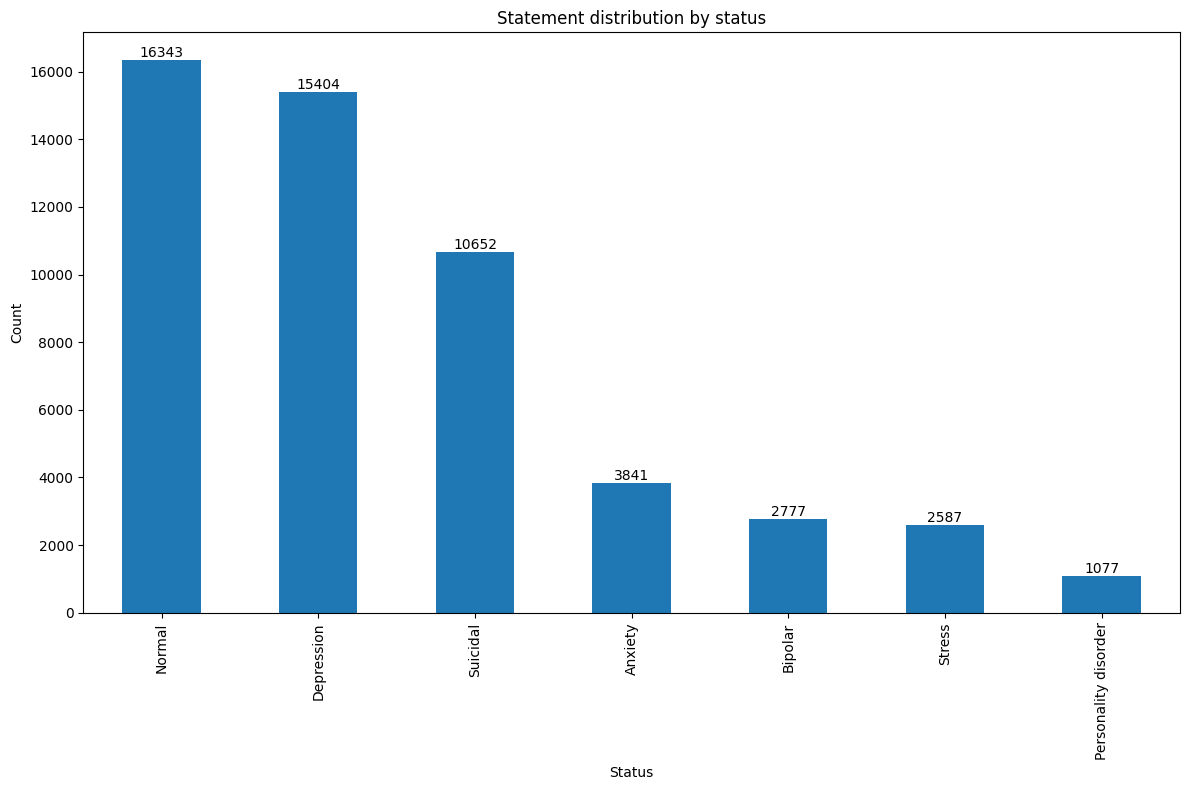

In [16]:
# Histogram of Frequency of Statements by Status
plt.figure(figsize=(12,8))

# get the unique status values and their counts
status_counts = df1['status'].value_counts()

# create the bar plot
ax = status_counts.plot(kind='bar')

# add the count labels on top of each bar
for i, v in enumerate(status_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.title('Statement distribution by status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Here is a plot showing distribution by status. Normal is the most common status and contains 16343 data, followed by depression and suicidal, which are the 2nd and 3rd largest portions of the dataset. Personality disorder is the most rare one, which contains 1077 data.

The ratio between different statuses suggests about 70% of the user's input falls under the negative status category.

The target variable in our dataset is unbalanced in favor of depression, suicidal and normal. This imbalance could affect our model's performance, so we'll need to address it later to ensure accurate and fair predictions especially when predicting sentiment analysis for anxiety, bipolar, stress and personality disorder.

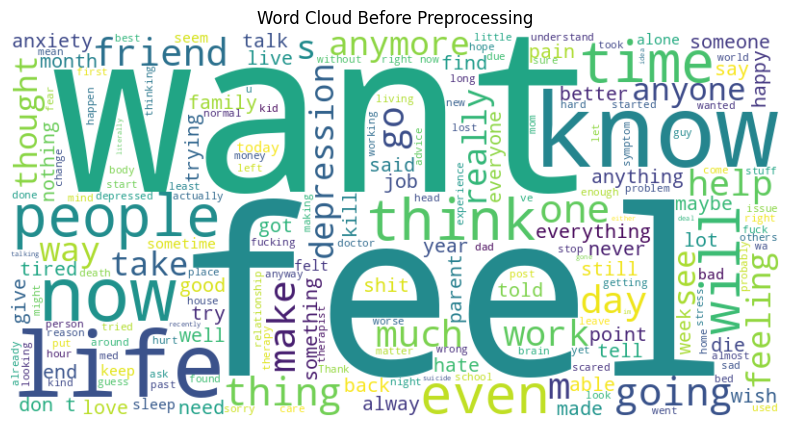

In [17]:
# Word Cloud Before Preprocessing
# Combine all statements into a single string
text = ' '.join(df1['statement'].dropna())

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Before Preprocessing')
plt.show()

Here is the word cloud for Statement before data processing, which will be used to compare with the data after processing. The word cloud shows that the most frequently used words are "feel," "want," "know," and "life.". The observation is reasonable considering verbs and similar expressions that reflect personal thoughts would be the biggest part of user inputs. We can also see words like "depression," "tired," and "anxiety" in the word cloud even before data processing, which matches our observation of the status distribution above.

This means that these words may be key indicators for determining sentiment. We will explore more by dividing word clouds into status.

### Week 3 Code- EDA and Train-Test Split

We have already done some EDA in the previous code but we will expand on it here. We will also do a train-test split.

In [18]:
# Taking a look at the long messages
df1[df1['statement_len'] > 1500]

,statement,status,statement_len
7851,So introduction I guess.. my name is Michael a...,Depression,2153
8221,do not really know where to start so I am goin...,Depression,1602
9504,"Hello everyone,I rarely post on Reddit but.......",Depression,2139
10743,"ThrowawayIm female, 20 years old. Ever since I...",Depression,1537
10834,I have only 1 person I can somewhat open to bu...,Suicidal,5248
11537,"The title is not meant to discourage others, b...",Depression,2391
11581,I no longer know what else to do but write thi...,Depression,2612
11636,And has life gotten better?&amp;#x200B;No. Eve...,Depression,2415
11831,Sorry this is long but I doubt anyone will eve...,Depression,2187
13188,I am frustrated. that is the constant theme wi...,Depression,1832


Many of the longest messages are those with depression and suicidal tendencies. This will help us since if we shorten the output length when preprocessing the data, we are not reducing the number of data points for those that do not have very many data points such as anxiety, bipolar, stress and personality disorder.

Now we want to see a clearer distribution without these outliers so that we can determine the best output length for preprocessing the text.

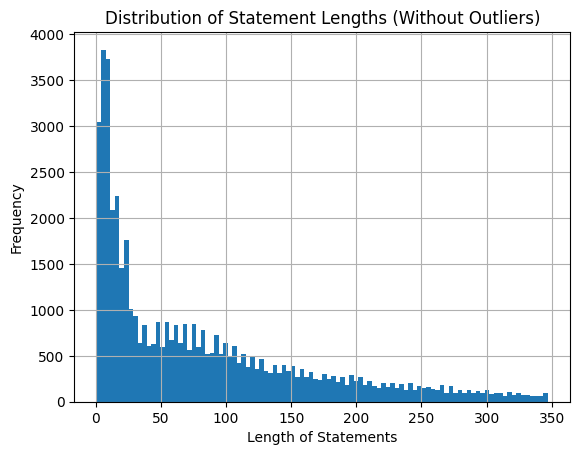

In [19]:
# Statement Length Distribution Without Outliers
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df1['statement_len'].quantile(0.25)
Q3 = df1['statement_len'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_df = df1[(df1['statement_len'] >= lower_bound) & (df1['statement_len'] <= upper_bound)]
# Plot the distribution of statement lengths without outliers
filtered_df['statement_len'].hist(bins=100)
plt.title('Distribution of Statement Lengths (Without Outliers)')
plt.xlabel('Length of Statements')
plt.ylabel('Frequency')
plt.show()

This distrubtion still shows a right-skewed data distribution. We now have a much clearer distribution where approximately 50% of the statements have 0-50 word lengths, especially with a spike at approximately 25 words with approximately 3700 statements. This will help us immensely to determine the best statement length to run our transformer models to save computational resources and time but not decrease model performance.

Now we want to take a closer look at the word clouds for each status since it will give us even more information about the possible word indicators for each status.  

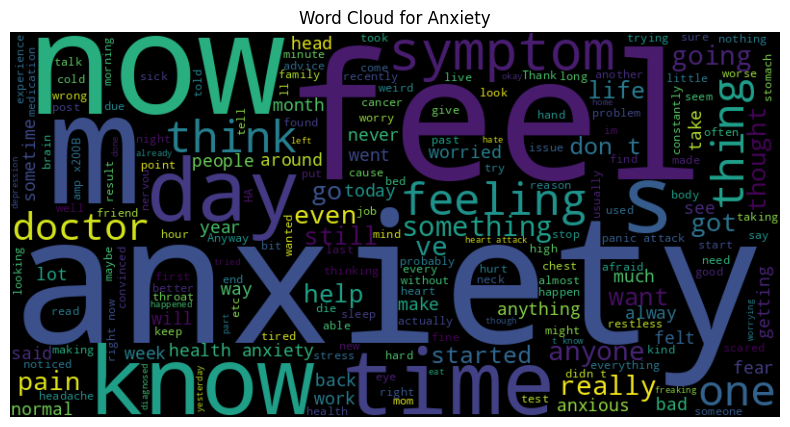

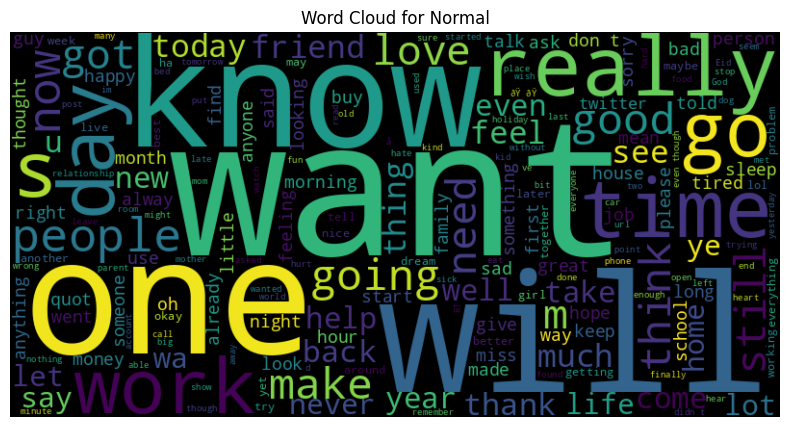

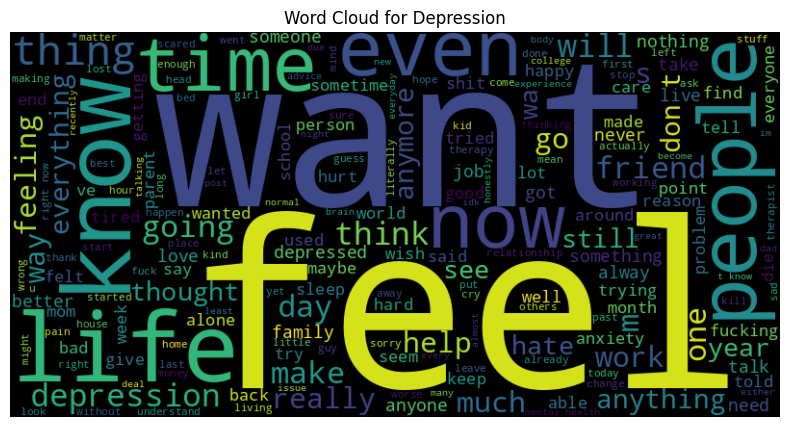

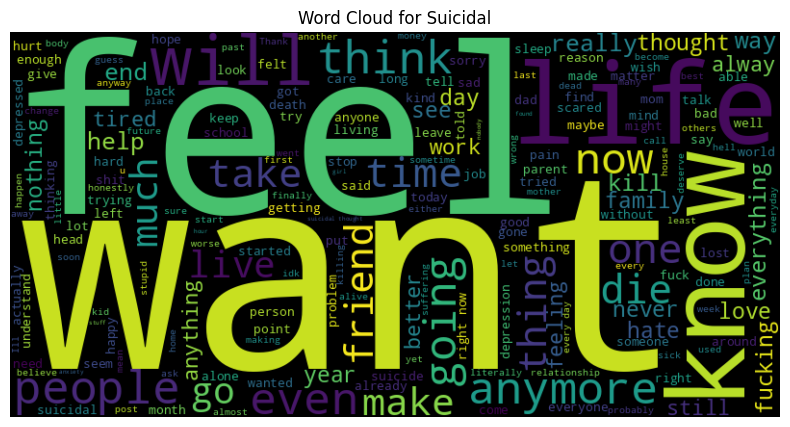

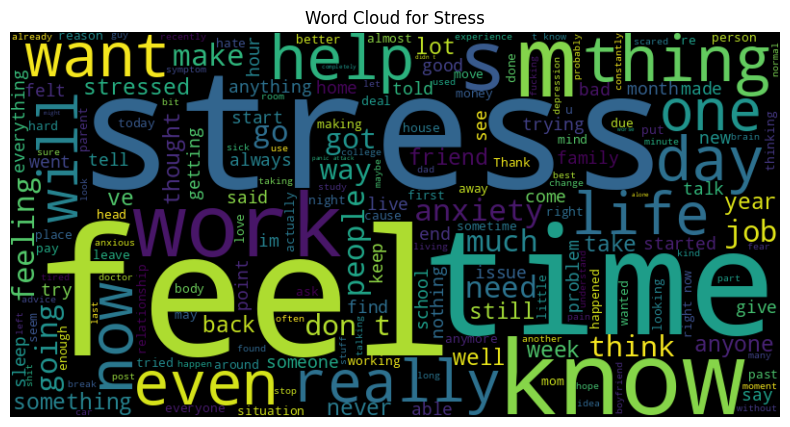

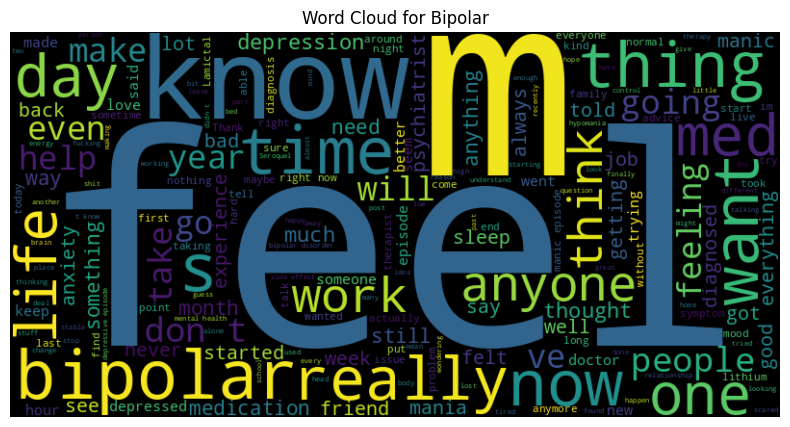

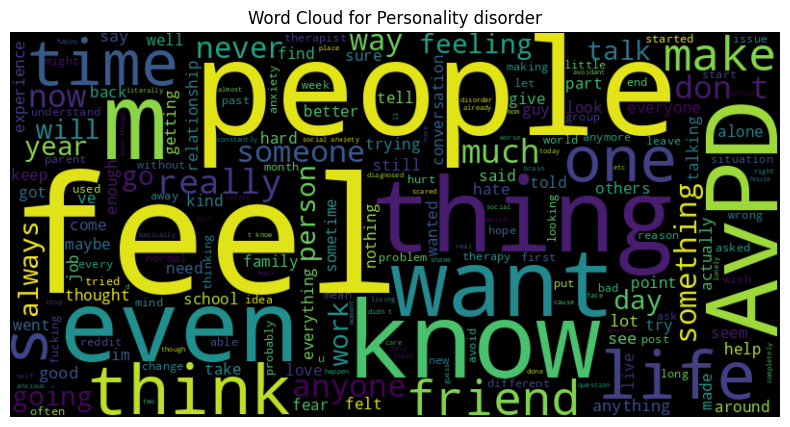

In [20]:
# Create a function to generate and display a word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate word clouds for each status
statuses = df1['status'].unique()

for status in statuses:
    status_text = ' '.join(df1[df1['status'] == status]['statement'])
    generate_word_cloud(status_text, title=f'Word Cloud for {status}')

We can see for anxiety, stress, and bipolar disorder that "anxiety" and "stress", "bipolar" are the most popular words. "AVPD", "people", and "feel" are the most common words for personality disorder. These words tend to make sense since the words are the literal statuses. Avoidant Personality Disorder (AVPD) is a mental health condition marked by chronic feelings of inadequacy, extreme sensitivity to criticism, and a strong desire to avoid social interactions due to fear of rejection and is a medical condition for a personality disorder.

"Will", "want", "know" are the most common words for normal. "Life", "feel", "want" are the most common words for suicidal. Many people with suicidal tendencies tend to talk about their lives. The words for "normal" status tend to have positive connotations especially "want" and "will", especially for a "will" to live.

These words seem to be preliminary indicators to help determine the status based on their statement. We can compare once we calculate sentiment scores.  

We want to conduct bi-grams and tri-grams analysis for these reasons:
Contextual Insights: Bi-grams and tri-grams capture phrases and context that single words (unigrams) might miss. This is particularly important in mental health, where phrases like "feeling down" or "very anxious" provide more insight than individual words.

Improved Sentiment Detection: Phrases often convey sentiment more accurately than single words. For example, "not happy" is a negative sentiment that might be missed if only individual words are considered.

Identifying Common Themes: Visualizing bi-grams and tri-grams helps identify common themes and expressions in the dataset. This can reveal patterns in how people express their mental health experiences.

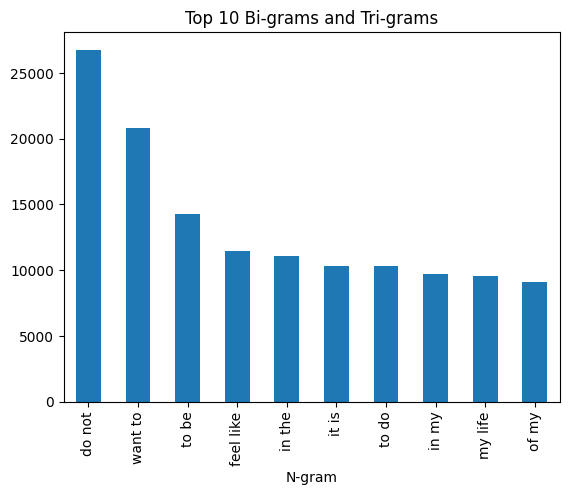

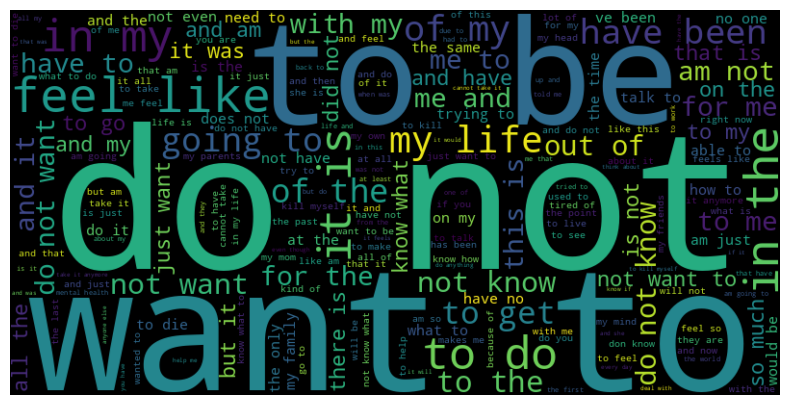

In [21]:
# import tokenizer
from sklearn.feature_extraction.text import CountVectorizer

# Tokenization and N-gram generation
# Create a CountVectorizer object with ngram_range set to (2, 3) to generate bi-grams and tri-grams
vectorizer = CountVectorizer(ngram_range=(2, 3))

# Fit and transform the 'statement' column of the DataFrame to generate the n-grams
X = vectorizer.fit_transform(df1['statement'])

# Frequency distribution
# Sum the occurrences of each n-gram across all documents
sum_words = X.sum(axis=0)

# Create a list of tuples where each tuple contains an n-gram and its corresponding frequency
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

# Sort the list of tuples by frequency in descending order
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# DataFrame for visualization
# Convert the list of tuples into a DataFrame for easier visualization
df_freq = pd.DataFrame(words_freq, columns=['N-gram', 'Frequency'])

# Bar plot
# Plot the top 10 most frequent n-grams as a bar plot
df_freq.head(10).plot(kind='bar', x='N-gram', y='Frequency', legend=False)
plt.title('Top 10 Bi-grams and Tri-grams')
plt.show()

# Word cloud
# Generate a word cloud from the n-gram frequencies
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(dict(words_freq))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

This visualizes the most common bi-grams and tri-grams in our dataset, providing insights into common phrases and patterns, which is particularly useful for sentiment analysis in mental health. It helps identify key expressions and themes that might indicate different emotional states or communication gaps. The top ten are do not, want to, to be, feel like, in the, it is, to do, in my, my life, and of my.

Negative Sentiments: Phrases like "do not" and "feel like" might indicate negative sentiments or expressions of reluctance and emotional states. These bi-grams can help identify statements where individuals are expressing dissatisfaction or discomfort.

Desires and Intentions: Bi-grams such as "want to" and "to do" suggest expressions of desires, intentions, or plans. Analyzing these can reveal what individuals are striving for or what actions they are considering, which can be linked to their mental state.

Self-Reflection: Phrases like "in my," "my life," and "of my" indicate self-reflection and personal experiences. These bi-grams can help identify statements where individuals are discussing their personal lives and feelings, which are critical for understanding their mental health.

General Context: Bi-grams like "to be," "in the," and "it is" provide general context and can be part of various expressions. While they might not directly indicate sentiment, they help in understanding the structure and flow of the text.

### Week 4 Code- Preprocessing the data

df1 is the dataframe that does not have any of the missing values.
filtered_df is the dataframe with the outliers removed and no missing values. We will keep the outliers since sentiment analysis often has extreme reviews (e.g., very short or long ones) that can hold strong emotions, valuable for classification especially when using non-transformer models. For transformer models, we may remove outliers by shortening the word length input or use filtered_df to reduce computational time without sacrificing performance. For now, we will use df1 to preprocess the data. Transformer models tend to have different preprocessing techniques anyways. 

⚠ **Warning:** After installing `imbalanced-learn`, please **restart the kernel** for the changes to take effect.  

You can do this in Jupyter Notebook by clicking:  
**Kernel** → **Restart Kernel**


In [22]:
# install packages 
!pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable


In [23]:
# import packages
import seaborn as sns

import re
import random
from imblearn.over_sampling import RandomOverSampler # used for oversampling
from scipy.sparse import hstack, csr_matrix  # To combine sparse matrices

import nltk # nlp package
from nltk.tokenize import word_tokenize # tokenize the text
from nltk.stem import PorterStemmer # stem the text

from sklearn.feature_extraction.text import TfidfVectorizer # used for tf-idf
from sklearn.model_selection import GridSearchCV # used to find the best parameters
from sklearn.preprocessing import LabelEncoder # used to encode categorical variables


In [24]:
# Remove duplicates based on 'statement'
df_unique = df1.drop_duplicates(subset=['statement'])

df_unique.head()

,statement,status,statement_len
0,oh my gosh,Anxiety,3
1,"trouble sleeping, confused mind, restless hear...",Anxiety,10
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,14
3,I've shifted my focus to something else but I'...,Anxiety,11
4,"I'm restless and restless, it's been a month n...",Anxiety,14


## Why Add Sentence & Character Length in NLP?

Enhancing NLP models like **Naïve Bayes** and **XGBoost** with numerical metadata (e.g., sentence length, character count) improves performance by capturing structural insights.

### 🚀 Benefits:
- **Structural Insights**  
  - **Sentence Length**: Differentiates concise vs. verbose texts (e.g., tweets vs. articles).  
  - **Character Length**: Indicates complexity, verbosity, or spam tendencies.  

- **Better Model Interpretability**  
  - Helps tree-based models (e.g., XGBoost) make effective splits.  
  - Useful for readability assessment, spam detection, and authorship identification.  

- **Performance Boost**  
  - Combines well with TF-IDF, embeddings, and n-grams.  
  - Provides independent signals, improving classification accuracy.  

### 🎯 Key Use Cases:
- **Sentiment Analysis**: Short reviews are often more direct (positive/negative).  


In [25]:
# Calculate the number of characters and sentences

df_unique['num_of_characters'] = df_unique['statement'].str.len()
df_unique['num_of_sentences'] = df_unique['statement'].apply(lambda x: len(nltk.sent_tokenize(x)))

# Generate descriptive statistics
description = df_unique[['num_of_characters', 'num_of_sentences']].describe()

# Display the descriptive statistics
print(description)

       num_of_characters  num_of_sentences
count       51073.000000      51073.000000
mean          575.375051          6.249251
std           847.661079         10.762749
min             2.000000          1.000000
25%            79.000000          1.000000
50%           313.000000          3.000000
75%           745.000000          8.000000
max         32759.000000       1260.000000


## Text Preprocessing

### Convert to lowercase for uniformity

In [26]:
# convert to lowercase
#rename columns
df_unique.rename(columns={'statement': 'original_statement'}, inplace=True)  

# create a new cleaned statement column called statement
df_unique['statement']=df_unique['original_statement'].str.lower()
# see the first ten rows
df_unique.head()

,original_statement,status,statement_len,num_of_characters,num_of_sentences,statement
0,oh my gosh,Anxiety,3,10,1,oh my gosh
1,"trouble sleeping, confused mind, restless hear...",Anxiety,10,64,2,"trouble sleeping, confused mind, restless hear..."
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,14,78,2,"all wrong, back off dear, forward doubt. stay ..."
3,I've shifted my focus to something else but I'...,Anxiety,11,61,1,i've shifted my focus to something else but i'...
4,"I'm restless and restless, it's been a month n...",Anxiety,14,72,2,"i'm restless and restless, it's been a month n..."


### Remove URLS and other text, punctuation, and special text
To remove specific patterns such as URLs or other unwanted text (like ```[View Poll](https://www.reddit.com/poll/...)```) from a column in a pandas DataFrame, we can use regular expressions with the re module or pandas built-in string methods. This will help us get cleaner relevant text.

In [27]:
def remove_patterns(text):
    # Remove URLs
    text = re.sub(r'http[s]?://\S+', '', text)
    # Remove markdown-style links
    text = re.sub(r'\[.*?\]\(.*?\)', '', text)
    # Remove handles (that start with '@')
    text = re.sub(r'@\w+', '', text)
    # Remove punctuation and other special characters
    text = re.sub(r'[^\w\s]', '', text)
    return text.strip()

# Apply the function to the 'statement' column
df_unique['statement'] = df_unique['statement'].apply(remove_patterns)
# see the first ten rows
df_unique.head()

,original_statement,status,statement_len,num_of_characters,num_of_sentences,statement
0,oh my gosh,Anxiety,3,10,1,oh my gosh
1,"trouble sleeping, confused mind, restless hear...",Anxiety,10,64,2,trouble sleeping confused mind restless heart ...
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,14,78,2,all wrong back off dear forward doubt stay in ...
3,I've shifted my focus to something else but I'...,Anxiety,11,61,1,ive shifted my focus to something else but im ...
4,"I'm restless and restless, it's been a month n...",Anxiety,14,72,2,im restless and restless its been a month now ...


### Tokenization 
This is when the statements are split into words/tokens.
Tokenization is **essential in NLP** as it breaks text into smaller units (tokens), making it **processable by models** like Naïve Bayes, XGBoost, and Transformers.

### 🔹 Key Benefits  
- **Structures Raw Text** → Converts unstructured text into a usable format.  
- **Boosts Model Performance** → Enables better text classification, sentiment analysis, etc.  
- **Handles Language Variability**  
  - **Word-based**: `"I love NLP"` → `["I", "love", "NLP"]`  
  - **Subword-based (BPE, WordPiece)**: `"unhappiness"` → `["un", "happiness"]`  
  - **Character-based**: Useful for languages without spaces (e.g., Chinese).  
- **Improves Efficiency** → Reduces complexity for machine learning models.    


In [28]:
# Apply word_tokenize to each element in the 'statement' column
df_unique['tokens'] = df_unique['statement'].apply(word_tokenize)
# see the first ten rows
df_unique.head()

,original_statement,status,statement_len,num_of_characters,num_of_sentences,statement,tokens
0,oh my gosh,Anxiety,3,10,1,oh my gosh,"[oh, my, gosh]"
1,"trouble sleeping, confused mind, restless hear...",Anxiety,10,64,2,trouble sleeping confused mind restless heart ...,"[trouble, sleeping, confused, mind, restless, ..."
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,14,78,2,all wrong back off dear forward doubt stay in ...,"[all, wrong, back, off, dear, forward, doubt, ..."
3,I've shifted my focus to something else but I'...,Anxiety,11,61,1,ive shifted my focus to something else but im ...,"[ive, shifted, my, focus, to, something, else,..."
4,"I'm restless and restless, it's been a month n...",Anxiety,14,72,2,im restless and restless its been a month now ...,"[im, restless, and, restless, its, been, a, mo..."


## 🌱 What is Stemming & Why is it Important in NLP?

**Stemming** reduces words to their root form by removing prefixes/suffixes, helping **normalize text** and **reduce dimensionality** in NLP.

### 🔹 How It Works  
- `"running"` → `"run"`  
- `"happily"` → `"happi"`  
- `"flies"` → `"fli"`  

### 🔥 Why It Matters  
- **Reduces Vocabulary Size** → Groups similar words.  
- **Boosts Search & NLP Models** → `"run"` and `"running"` treated alike.  
- **Speeds Up Processing** → Fewer unique tokens.  

### ⚠️ Limitation  
- Can produce **incorrect roots** (`"better"` → `"bet"`).  
- **Lemmatization** (more accurate) uses a dictionary.  

### 🎯 Takeaway  
Stemming **simplifies text, reduces redundancy, and improves efficiency** in NLP. 🚀  


In [29]:
# Initialize the stemmer
stemmer = PorterStemmer()

# Function to stem tokens and convert them to strings
def stem_tokens(tokens):
    return ' '.join(stemmer.stem(str(token)) for token in tokens)

# Apply the function to the 'tokens' column
df_unique['tokens_stemmed'] = df_unique['tokens'].apply(stem_tokens)

# print the first ten rows
df_unique.head()


,original_statement,status,statement_len,num_of_characters,num_of_sentences,statement,tokens,tokens_stemmed
0,oh my gosh,Anxiety,3,10,1,oh my gosh,"[oh, my, gosh]",oh my gosh
1,"trouble sleeping, confused mind, restless hear...",Anxiety,10,64,2,trouble sleeping confused mind restless heart ...,"[trouble, sleeping, confused, mind, restless, ...",troubl sleep confus mind restless heart all ou...
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,14,78,2,all wrong back off dear forward doubt stay in ...,"[all, wrong, back, off, dear, forward, doubt, ...",all wrong back off dear forward doubt stay in ...
3,I've shifted my focus to something else but I'...,Anxiety,11,61,1,ive shifted my focus to something else but im ...,"[ive, shifted, my, focus, to, something, else,...",ive shift my focu to someth els but im still w...
4,"I'm restless and restless, it's been a month n...",Anxiety,14,72,2,im restless and restless its been a month now ...,"[im, restless, and, restless, its, been, a, mo...",im restless and restless it been a month now b...


##  Not Removing Stop Words

Stop words are **frequent words** that may not carry significant meaning in NLP tasks.  

### 📝 **General Stop Words**  
- **Articles** → *a, an, the*  
- **Prepositions** → *in, on, at, by, with*  
- **Pronouns** → *I, you, he, she, it, they*  
- **Conjunctions** → *and, but, or, so*  
- **Auxiliary Verbs** → *is, are, was, were, have, do, does*  

For **mental health sentiment analysis**, it's best to **keep stop words** because:  

### 🔹 Context Matters  
- Words like **"not," "never," "very"** can flip sentiment.  
  - *"not okay"* ≠ *"okay"*  

### 🔹 Emotional Expressions  
- Stop words are essential for capturing **feelings and emotions**.  
  - *"I feel so lost"* carries more meaning than *"feel lost"*.  

We can see from the word clouds that there are not many stop words that are in bold so we will not remove them.  


In [30]:
# Now we create our dataset for train-validation-test adding the numerical features

In [31]:
X = df_unique[['tokens_stemmed', 'num_of_characters', 'num_of_sentences']]
y = df_unique['status']

## 🔠 Why Use Label Encoding for Categorical Variables?  

Label encoding converts **categorical target variables (Y)** into numerical format for machine learning models.  

### 🔹 Why is it Necessary?  
- **ML Models Require Numeric Input** → Algorithms like **XGBoost, Naïve Bayes, SVM** can’t process text labels.  
- **Standardizes Target Variable** → Maps categories to integers (*e.g., "positive" → 2, "neutral" → 1, "negative" → 0*).  
- **Compatible with Many Models** → Needed for both **classification** and **regression tasks**.  


In [32]:
# label encode our categorical variables for y 
lbl_enc = LabelEncoder()
y = lbl_enc.fit_transform(y.values)

### Train-Validation-Test Split

Most common splits are 80-20 so we will use this split here. We will also create a validation set that is 10% and the test set is 10%. The final splits will be 80-10-10.

I did these splits, since this is a common split in machine learning and data science but also because with 80% of the data as a training dataset, a large portion ensures that the model has enough data to learn from, which helps in capturing the underlying patterns and relationships in the data. With a Validation Set of 10%, it can tune hyperparameters and make decisions about the model architecture and helps prevent overfitting by providing a checkpoint to evaluate the model's performance on unseen data during the training process. With a 10% Test Set, we can evaluate the model's performance after it has been trained and validated and 10% is a large enough size given that we have approximately 50,000 data points. The 80-10-10 split is a balanced approach that ensures the model has sufficient data for training while also providing enough data for validation and testing to ensure robust performance

In [33]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and temporary (20%) sets
train_x, temp_x, train_y, temp_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the temporary set into validation (50%) and test (50%) sets
val_x, test_x, val_y, test_y = train_test_split(temp_x, temp_y, test_size=0.5, random_state=42)

# Print the sizes of the splits
print(f"Training set size: {len(train_x)}")
print(f"Validation set size: {len(val_x)}")
print(f"Test set size: {len(test_x)}")


Training set size: 40858
Validation set size: 5107
Test set size: 5108


### Week 5 Code-  Feature Engineering, Data Augmentation and Reducing Dimensionality

We created the number of sentences and the character length as new features from the "statement" column earlier. 

Since we only had "statement" column to begin with, we did not need to reduce dimensionality from our original dataset. However, we decided to remove statement_length from the data since these are very similar to number of characters and number of sentences.

Enhancing NLP models like Naïve Bayes and XGBoost with numerical metadata significantly improves performance by capturing valuable structural insights.  Sentence length, for example, differentiates concise texts like tweets from verbose articles.  Character count can indicate text complexity, verbosity, or even spam tendencies.  These structural features not only offer better model interpretability, aiding tree-based models like XGBoost in making effective splits, but also boost overall performance.  This metadata combines well with traditional NLP features like TF-IDF, embeddings, and n-grams, providing independent signals that enhance classification accuracy.  Applications include readability assessment, spam detection, and even authorship identification, demonstrating the broad utility of incorporating numerical metadata into NLP workflows.

In [34]:
# look at training set to see the new features that we built earlier such as num_of_characters and num_of_sentences
train_x.head()

,tokens_stemmed,num_of_characters,num_of_sentences
1488,my children were given a no limit theme whi ar...,131,1
21192,i feel complet lost with thing too mani overwh...,5371,41
23638,hi i am an incom senior in highschool and my m...,544,6
35989,never been to war but i get terribl nightmar t...,101,2
44721,justagirl 9 that s great about your licens wis...,78,1


### Convert Text to Features using tf-idf to reduce dimensionality

Now, we will transform tokens (words) into numerical values that represent the importance of words in a document relative to a collection of documents. This helps highlight unique words in a document while downplaying common ones, making it easier for machine learning models to identify relevant patterns and make better predictions.

TF-IDF plays a crucial role in sentiment analysis by weighting the importance of words within a document relative to the entire collection of documents (corpus).  While it doesn't strictly *reduce* dimensionality like PCA by eliminating features (words), it effectively manages complexity by assigning weights that reflect a word's relevance.  Term Frequency (TF) measures how often a word appears in a specific document, while Inverse Document Frequency (IDF) quantifies how rare that word is across the corpus.  Common words like "the" or "a" appear frequently in almost all documents, resulting in low IDF scores.  Conversely, words that appear frequently in some documents but rarely elsewhere have high IDF scores.  The TF-IDF score, the product of TF and IDF, reflects the overall importance of a word in a particular document within the larger context of the corpus.

This weighting scheme is key to sentiment analysis because it downplays the influence of common, often uninformative words that contribute little to sentiment.  These words, while frequent, are essentially noise.  At the same time, TF-IDF highlights the words that are most discriminative of sentiment, those that appear frequently in documents expressing a particular sentiment but rarely elsewhere.  By emphasizing these key terms, TF-IDF effectively reduces the impact of less relevant dimensions (words), allowing sentiment analysis models to focus on the most informative features.  This leads to improved performance by making the model more robust to the curse of dimensionality, even though the actual number of features isn't reduced.  In short, TF-IDF acts as a feature weighting mechanism, prioritizing the signal (sentiment indicators) over the noise (common words).


In [35]:
# 1. Initialize TF-IDF Vectorizer and fit/transform on the 'tokens_stemmed' column
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=50000)
X_train_tfidf = vectorizer.fit_transform(train_x['tokens_stemmed'])
X_val_tfidf = vectorizer.transform(val_x['tokens_stemmed'])

# 2. Extract numerical features and convert to sparse matrix
X_train_num = csr_matrix(train_x[['num_of_characters', 'num_of_sentences']].values)
X_val_num = csr_matrix(val_x[['num_of_characters', 'num_of_sentences']].values)

# 3. Combine TF-IDF features with numerical features
X_train_combined = hstack([X_train_tfidf, X_train_num])
X_val_combined = hstack([X_val_tfidf, X_val_num])

# Print number of feature words
print('Number of feature words:', len(vectorizer.get_feature_names_out()))


Number of feature words: 50000


In [36]:
X_train_combined.shape

(40858, 50002)

## ⚖️ Why Oversampling for an Imbalanced Dataset?  

In an **imbalanced dataset**, the model may favor the majority class, leading to **biased predictions**. **Oversampling** helps balance the dataset by increasing minority class samples.

### 🔹 Why is Oversampling Needed?  
- **Prevents Majority Class Bias** → Ensures the model learns patterns from both classes.  
- **Improves Model Performance** → Leads to better recall, F1-score, and generalization.  
- **Enhances Minority Class Representation** → Avoids underestimating rare but important cases.

### 🔥 Why Does Random Over-Sampling Work Best?   
✅ **Maintains Original Data Distribution** → Simply duplicates minority class samples, avoiding synthetic noise (SMOTE).  
✅ **Preserves Minority Class Variability** → Unlike SMOTE, which may create unrealistic synthetic samples.  
✅ **Avoids Data Loss** → Unlike Under-Sampling, which removes majority class samples and risks losing valuable information.


In [37]:
# Apply Random Over-Sampling on the vectorized data
ros = RandomOverSampler(random_state=101)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_combined,train_y)

In [38]:
# see the new dataset
X_train_resampled.shape

(89215, 50002)